In [8]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [7]:
import pandas as pd
import tensorflow as tf
import numpy as np
import os
from sklearn.model_selection import train_test_split


In [6]:
import numpy as np
import os
from sklearn.metrics import confusion_matrix
import seaborn as sn; sn.set(font_scale=1.4)
from sklearn.utils import shuffle           
import matplotlib.pyplot as plt             
import cv2                                 
import tensorflow as tf                
from tqdm import tqdm

In [2]:
data_train_path = "C:\\Users\\Aarav Phutane\\Documents\\Aarav Phutane\\ML projects\\archive\\seg_train\\seg_train"
data_test_path = "C:\\Users\\Aarav Phutane\\Documents\\Aarav Phutane\\ML projects\\archive\\seg_test\\seg_test"
data_pred_path = "C:\\Users\\Aarav Phutane\\Documents\\Aarav Phutane\\ML projects\\archive\\seg_pred\\seg_pred"


In [20]:
img_height, img_width = 180, 180
batch_size = 32

train_ds = tf.keras.utils.image_dataset_from_directory(
    data_train_path,
    validation_split=0.2,
    subset="training",
    seed=42,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    data_train_path,
    validation_split=0.2,
    subset="validation",
    seed=42,
    image_size=(img_height, img_width),
    batch_size=batch_size
)


Found 14034 files belonging to 6 classes.
Using 11228 files for training.
Found 14034 files belonging to 6 classes.
Using 2806 files for validation.


In [21]:
test_ds = tf.keras.utils.image_dataset_from_directory(
    data_test_path,
    image_size=(img_height, img_width),
    batch_size=batch_size
)


Found 3000 files belonging to 6 classes.


In [22]:
pred_ds = tf.keras.utils.image_dataset_from_directory(
    data_pred_path,
    image_size=(img_height, img_width),
    batch_size=batch_size,
    shuffle=False,
    label_mode=None
)


Found 7301 files.


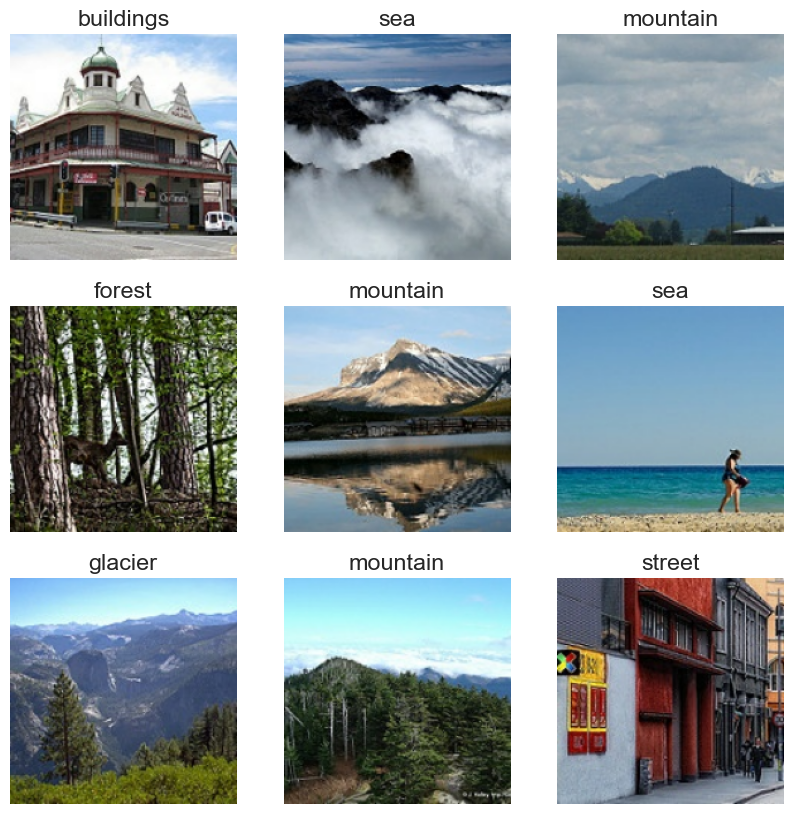

In [28]:
import matplotlib.pyplot as plt

class_names = train_ds.class_names  

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):  
    for i in range(9):  
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")
plt.show()


In [24]:
train_ds


<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [27]:
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(180, 180, 3)),
    layers.MaxPooling2D(pool_size=(2, 2)),
    
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(6, activation='softmax')
])

model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 178, 178, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 89, 89, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 87, 87, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 43, 43, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 41, 41, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 20, 20, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 51200)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │       6,553,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 6)                   │             774 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,647,750 (25.36 MB)

 Trainable params: 6,647,750 (25.36 MB)

 Non-trainable params: 0 (0.00 B)

In [29]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=10
)


Epoch 1/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 75s 208ms/step - accuracy: 0.3277 - loss: 26.1483 - val_accuracy: 0.2003 - val_loss: 1.7655
Epoch 2/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 75s 213ms/step - accuracy: 0.3563 - loss: 1.5303 - val_accuracy: 0.5057 - val_loss: 1.2110
Epoch 3/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 65s 186ms/step - accuracy: 0.5438 - loss: 1.1353 - val_accuracy: 0.5535 - val_loss: 1.1128
Epoch 4/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 59s 169ms/step - accuracy: 0.6279 - loss: 0.9265 - val_accuracy: 0.5588 - val_loss: 1.2170
Epoch 5/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 57s 163ms/step - accuracy: 0.6861 - loss: 0.7880 - val_accuracy: 0.5175 - val_loss: 1.4650
Epoch 6/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 57s 161ms/step - accuracy: 0.7397 - loss: 0.6617 - val_accuracy: 0.5025 - val_loss: 1.4693
Epoch 7/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 56s 159ms/step - accuracy: 0.7735 - loss: 0.5724 - val_accuracy: 0.5431 - val_loss: 1.7052
Epoch 8/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 57s 163ms/step - accuracy: 0.7784 - loss: 

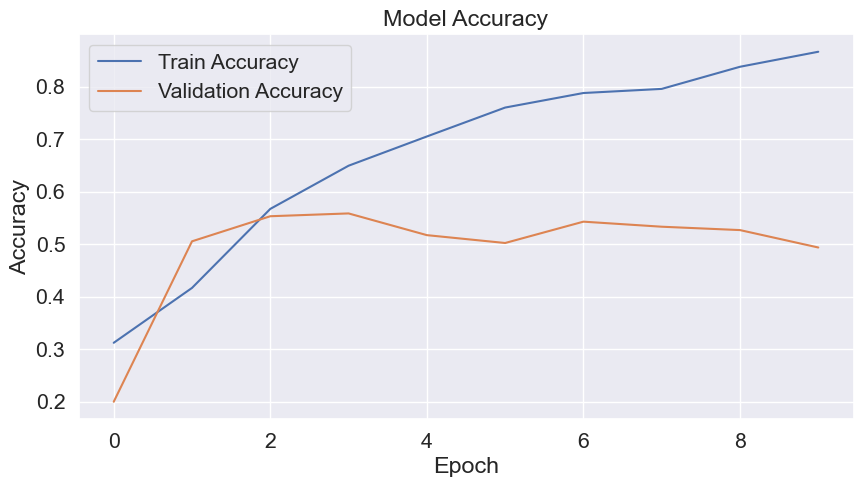

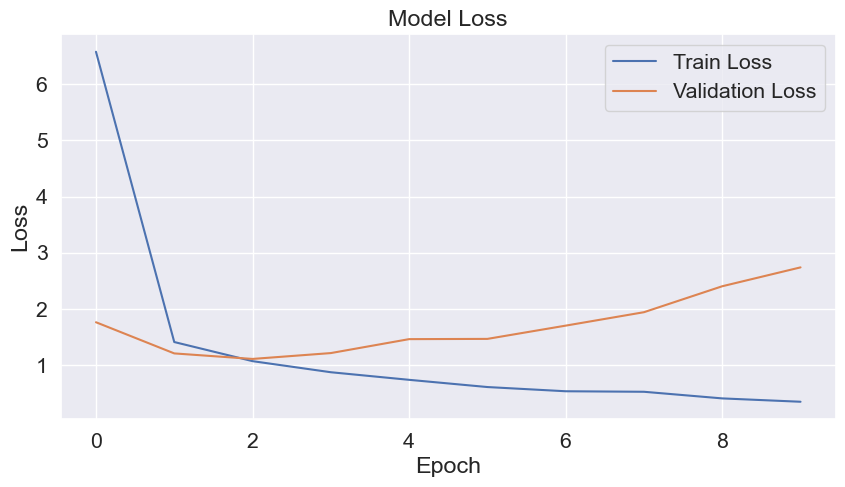

In [30]:
import matplotlib.pyplot as plt

# Accuracy plot
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Loss plot
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step


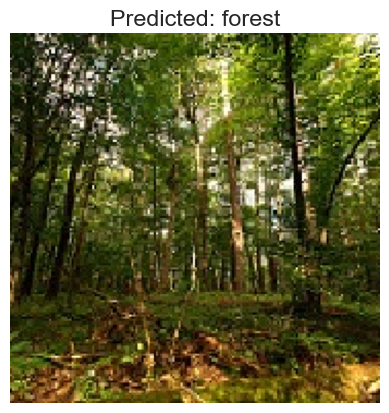

In [31]:
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

img_path = "C:\\Users\\Aarav Phutane\\Documents\\Aarav Phutane\\ML projects\\forest.jpg"
img = image.load_img(img_path, target_size=(180, 180))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = img_array / 255.0

pred = model.predict(img_array)
predicted_class = np.argmax(pred, axis=1)[0]
class_names = ['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']
predicted_label = class_names[predicted_class]

plt.imshow(img)
plt.title(f"Predicted: {predicted_label}")
plt.axis("off")
plt.show()
